In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer  # Change to TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\AB92922\Downloads\news.csv", index_col=None)
dataset = df.drop("Unnamed: 0", axis=1)

In [3]:
# Split dataset into features and target
y = dataset["label"]
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], y, test_size=0.33, random_state=42)

In [4]:
# Text preprocessing with TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # Use TfidfVectorizer
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [5]:
# List of classifiers to evaluate
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Passive Aggressive": PassiveAggressiveClassifier(max_iter=1000, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to store the accuracy of each classifier
accuracy_dict = {}

In [6]:
# Function to evaluate classifiers and make predictions
def evaluate_classifier(clf_name, clf):
    clf.fit(tfidf_train, y_train)  # Fit the model
    pred = clf.predict(tfidf_test)  # Make predictions
    accuracy = metrics.accuracy_score(y_test, pred)  # Compute accuracy
    accuracy_dict[clf_name] = accuracy  # Store accuracy
    
    print(f"\nClassifier: {clf_name}")
    print(f"Accuracy: {accuracy:.2f}")
    
    # Print the classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(y_test, pred, target_names=['FAKE', 'REAL']))
    
    cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
    print(f"Confusion Matrix:\n{cm}")
    
# Loop through classifiers and evaluate each
for clf_name, clf in classifiers.items():
    evaluate_classifier(clf_name, clf)


Classifier: Naive Bayes
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.97      0.66      0.78      1071
        REAL       0.73      0.98      0.84      1020

    accuracy                           0.82      2091
   macro avg       0.85      0.82      0.81      2091
weighted avg       0.86      0.82      0.81      2091

Confusion Matrix:
[[ 704  367]
 [  19 1001]]

Classifier: Passive Aggressive
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94      1071
        REAL       0.94      0.93      0.93      1020

    accuracy                           0.94      2091
   macro avg       0.94      0.94      0.94      2091
weighted avg       0.94      0.94      0.94      2091

Confusion Matrix:
[[1007   64]
 [  69  951]]

Classifier: Logistic Regression
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   suppor

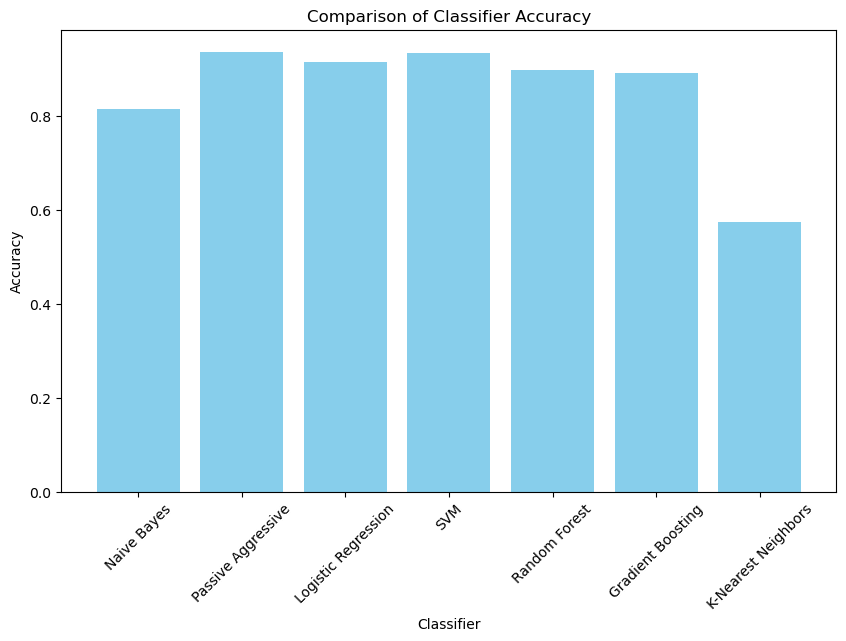

In [7]:
# Plotting the accuracies using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(accuracy_dict.keys(), accuracy_dict.values(), color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracy')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Fit the Passive Aggressive Classifier model
passive_aggressive_model = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
passive_aggressive_model.fit(tfidf_train, y_train)  # Train the model with TfidfVectorizer

# Function to predict new text using the Passive Aggressive Classifier model
def predict_new_text_passive_aggressive(new_text):
    # Transform the new text using the same TfidfVectorizer
    new_text_transformed = tfidf_vectorizer.transform([new_text])
    # Predict the label
    prediction = passive_aggressive_model.predict(new_text_transformed)
    # Return the predicted label
    return 'FAKE' if prediction == 0 else 'REAL'

# Example predictions with new text
new_samples = [
    "The stock market has reached an all-time high!",
    "Aliens have invaded Earth and are demanding to speak to the President.",
    "Scientists say that drinking coffee can help you live longer.",
    "New studies reveal that cats can actually speak human languages."
]

# Make predictions for each new sample
for sample in new_samples:
    predicted_label = predict_new_text_passive_aggressive(sample)
    print(f"Predicted label for '{sample}': {predicted_label}")


Predicted label for 'The stock market has reached an all-time high!': REAL
Predicted label for 'Aliens have invaded Earth and are demanding to speak to the President.': REAL
Predicted label for 'Scientists say that drinking coffee can help you live longer.': REAL
Predicted label for 'New studies reveal that cats can actually speak human languages.': REAL


C:\Users\AB92922\AppData\Local\Temp\ipykernel_17780\474184198.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return 'FAKE' if prediction == 0 else 'REAL'


In [9]:
# Assuming previous code for training the model is already executed...

# Example prediction for the first entry in the training dataset
sample_text = X_train.iloc[0]  # Get the first text entry from the training data
predicted_label = predict_new_text_passive_aggressive(sample_text)
print(f"Predicted label for '{sample_text}': {predicted_label}")

# Optionally, you can also print the actual label to compare
actual_label = y_train.iloc[0]
print(f"Actual label: {actual_label}")


Predicted label for 'The next president is most likely to face an international crisis shortly after taking office — and both Donald Trump and Hillary Clinton "have a credibility problem in foreign affairs," former Defense Secretary Robert Gates said Friday.

"Clinton was the senior-most advocate for using the U.S. military to bring ill-fated regime change in Libya and, further, failed to anticipate the chaos that would follow," Gates, who has served eight presidents over 50 years, wrote in an op-ed in The Wall Street Journal. "The same failure she and other Democrats hung around the neck of the Bush 43 administration in post-Saddam Iraq."

Regarding Trump, "when it comes to credibility problems, though, Donald Trump is in a league of his own," Gates said.

"He has expressed support for building a wall between the U.S. and Mexico; for torturing suspected terrorists and killing their families; for [Vladimir] Putin’s dictatorial leadership and for Saddam Hussein’s nonexistent successes a

C:\Users\AB92922\AppData\Local\Temp\ipykernel_17780\474184198.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return 'FAKE' if prediction == 0 else 'REAL'


In [10]:
# Assuming previous code for training the model is already executed...

# Example prediction for the first entry in the training dataset
sample_text = X_train.iloc[1]  # Get the first text entry from the training data
predicted_label = predict_new_text_passive_aggressive(sample_text)
print(f"Predicted label for '{sample_text}': {predicted_label}")

# Optionally, you can also print the actual label to compare
actual_label = y_train.iloc[1]
print(f"Actual label: {actual_label}")


Predicted label for 'Following news of FBI Director James Comey’s decision to reopen the investigation into Hillary Clinton’s use of a private email server during her tenure at the State Department, federal law enforcement officials have come forward with new details on recently discovered evidence in the case.
More on this: DEVELOPING: FBI Reopens Investigation into Clinton Emails After New ‘Pertinent’ Evidence Discovered 
While Director Comey declined to provide specific details on what the newly discovered Clinton emails contained, federal law enforcements officials speaking under anonymity have explained that the emails were found on the personal devices of Clinton aide Huma Abedin and disgraced former Congressman Anthony Weiner.
The discovery came as part of investigation into yet another Weiner ‘sexting’ scandal, this time after he was alleged to have been engaging in sexually explicit conversations with an underage female.
More on the latest Weiner scandal: ‘Carlos Danger’ Strik

C:\Users\AB92922\AppData\Local\Temp\ipykernel_17780\474184198.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return 'FAKE' if prediction == 0 else 'REAL'
